https://www.python-kurs.eu/numpy.php

In [4]:
import numpy as np
import matplotlib as mpl

### Numpy

In [5]:
#definition einer liste mit temperaturen
cvalues = [20.1, 20.8, 21.9, 22.5, 21.8, 21.3, 20.9, 20.1]

In [6]:
#erzeugen eines numpy-arrays aus liste oben
c = np.array(cvalues)
print(c, type(c))

[20.1 20.8 21.9 22.5 21.8 21.3 20.9 20.1] <class 'numpy.ndarray'>


In [7]:
#werte von grad in fahrenheit berechnen lassen
print(c * 9 / 5 + 32)

[68.18 69.44 71.42 72.5  71.24 70.34 69.62 68.18]


In [8]:
#array c bleibt dabei unveränderlich
print(c)

[20.1 20.8 21.9 22.5 21.8 21.3 20.9 20.1]


In [9]:
#alternative längere möglichkeit zur berechnung
fvalues = [x*9/5 + 32 for x in cvalues]
print(fvalues)

[68.18, 69.44, 71.42, 72.5, 71.24000000000001, 70.34, 69.62, 68.18]


In [10]:
#c ist instanz der klasse numpy.ndarray
type(c)

numpy.ndarray

### Matplotlib (= grafische Darstellung von Werten)

In [12]:
#um plot innerhalb eines Fensters anzuzeigen und nicht separat:
%matplotlib inline

#bei extern: dementsprechend ohne inline als matplotlib

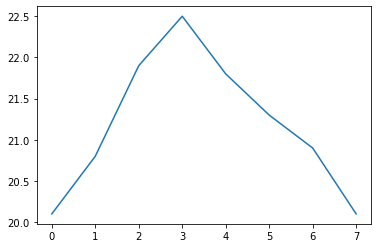

In [17]:
import matplotlib.pyplot as plt #meiste matplotlib gehören zu pyplot
plt.plot(c) #übernimmt werte von oben in eine grafik
plt.show() #sozusagen der print-befehlt für die gezeichneten werte aus plt.plot(value)

##### Speicherverbrauch von Listen ausgeben

In [30]:
from sys import getsizeof as size

lst = [24, 12, 57]
size_of_list_object = size(lst)
size_of_elements = len(lst) * size(lst[0])
total_list_size = size_of_list_object + size_of_elements

print('Größe ohne Größe der Elemente: ', size_of_list_object)
print('Größe aller Elemente: ', size_of_elements)
print('Gesamtgröße der Liste: ', total_list_size)

lst2 = []
print('\nSpeicherbedarf einer leeren Liste: ', size(lst2))

Größe ohne Größe der Elemente:  120
Größe der Elemente:  84
Gesamtgröße der Liste:  204

Speicherbedarf einer leeren Liste:  56


##### Speicherbedarf von Arrays ausgeben

In [31]:
#speziell
a = np.array([24, 12, 57])
print(size(a))

116


In [32]:
#allgemein
e = np.array([])
print(size(e))

104


##### Größen von Arrays festlegen

In [35]:
#standard-größe: int64
a = np.array([24, 12, 57], np.int8)
print(size(a)-96)
a = np.array([24, 12, 57], np.int16)
print(size(a)-96)
a = np.array([24, 12, 57], np.int32)
print(size(a)-96)
a = np.array([24, 12, 57], np.int64)
print(size(a)-96)

11
14
20
32


### Zeitvergleich zwischen Python-Listen und NumPy-Arrays

In [49]:
import numpy as np
import time

size_of_vec = 1000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X))]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1



t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("NumPy is in this example " + str(t1/t2) + " faster!")

0.0 0.0


ZeroDivisionError: float division by zero

In [48]:
#zeitmessung einfacher dank timeit-funktion

import numpy as np
from timeit import Timer
size_of_vec = 1000
def pure_python_version():
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X))]
def numpy_version():
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
timer_obj1 = Timer("pure_python_version()", 
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", 
                   "from __main__ import numpy_version")
print(timer_obj1.timeit(10))
print(timer_obj2.timeit(10))

0.005144300000210933
0.0006035000001247681


In [47]:
#repeat: vereinfachte möglichkeit, die methode timeit mehrmals aufzurufen ud eine liste der ergebnisse zu erhalten
print(timer_obj1.repeat(repeat=3, number=10))
print(timer_obj2.repeat(repeat=3, number=10))

[0.007649300000139192, 0.0058430000003681926, 0.005344899999727204]
[0.00021800000013172394, 0.0013535000002775632, 9.410000029674848e-05]
